# Exercice 1 : Optimisation de production du club 

In [6]:
%%script glpsol -m /dev/stdin --cuts --fpump

var chaises >= 0;
var bancs >= 0;
var tables >= 0;

maximize Benefice: 3000*chaises + 3000*bancs + 5000*tables;

s.t. MiseForme: 1.2*chaises + 1.7*bancs + 1.2*tables <= 1000;
s.t. Soudure: 0.8*chaises + 2.3*tables <= 1200;
s.t. StockTubes: 2*chaises + 3*bancs + 4.5*tables <= 2000;

solve;

printf "exo 1\n";
printf "Chaises: %f\n", chaises;
printf "Bancs: %f\n", bancs;
printf "Tables: %f\n", tables;
printf "Bénéfice: %f F\n", Benefice;

printf "\vérification\n";
printf "Mise en forme: %f / 1000\n", 1.2*chaises + 1.7*bancs + 1.2*tables;
printf "Soudure: %f / 1200\n", 0.8*chaises + 2.3*tables;
printf "Tubes: %f / 2000\n", 2*chaises + 3*bancs + 4.5*tables;

end;

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m /dev/stdin --cuts --fpump
Reading model section from /dev/stdin...
25 lines were read
Generating Benefice...
Generating MiseForme...
Generating Soudure...
Generating StockTubes...
Model has been successfully generated
GLPK Simplex Optimizer, v4.65
4 rows, 3 columns, 11 non-zeros
Preprocessing...
3 rows, 3 columns, 8 non-zeros
Scaling...
 A: min|aij| =  8.000e-01  max|aij| =  4.500e+00  ratio =  5.625e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 3
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (3)
*     2: obj =   2.766666667e+06 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.1 Mb (102351 bytes)
exo 1
Chaises: 700.000000
Bancs: 0.000000
Tables: 133.333333
Bénéfice: 2766666.666667 F
vérification
Mise en forme: 1000.000000 / 1000
Soudure: 866.666667 / 1200
Tubes: 2000.000000 / 2000
Model has been successfully proces

# Exercice 2: Mali NEGUE 

In [7]:
%%script glpsol -m /dev/stdin

var A >= 0;
var B >= 0;

maximize CA: 1500000*A + 1000000*B;

s.t. Namory: 1*A + 2*B <= 24;
s.t. Ibrahim: 2*A + 1*B <= 45;
s.t. Aicha: 1*A + 3*B <= 30;

solve;

printf "\exo2\n";
printf "Plan de production:\n";
printf "Escalier A: %f\n", A;
printf "Escalier B: %f\n", B;
printf "Chiffre affairs: %f F\n", CA;

printf "\utilisat ressources:\n";
printf "Namory: %f / 24h\n", 1*A + 2*B;
printf "Ibrahim: %f / 45h\n", 2*A + 1*B;
printf "Aicha: %f / 30h\n", 1*A + 3*B;

printf "\nVariables duales (coûts marginaux):\n";
printf "Namory: %f\n", Namory.dual;
printf "Ibrahim: %f\n", Ibrahim.dual;
printf "Aicha: %f\n", Aicha.dual;

end;

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m /dev/stdin
Reading model section from /dev/stdin...
29 lines were read
Generating CA...
Generating Namory...
Generating Ibrahim...
Generating Aicha...
Model has been successfully generated
GLPK Simplex Optimizer, v4.65
4 rows, 2 columns, 8 non-zeros
Preprocessing...
3 rows, 2 columns, 6 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  3.000e+00  ratio =  3.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 3
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   3.400000000e+07 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.1 Mb (102343 bytes)
exo2
Plan de production:
Escalier A: 22.000000
Escalier B: 1.000000
Chiffre affairs: 34000000.000000 F
utilisat ressources:
Namory: 24.000000 / 24h
Ibrahim: 45.000000 / 45h
Aicha: 25.000000 / 30h

Variables duales (coûts marginaux):
Namory: 166666.6666

# Exercice 3: descente de gradient


Tests:

Alpha = 0.5
Point final: (2.000, 0.000)
f = 18.000000
Nb itérations: 101

Alpha = 0.6
Point final: (2.000, -1230055826654970.000)
f = 3026074673375697913943529881600.000000
Nb itérations: 101

Alpha = 0.7
Point final: (2.000, -101011719728254138378616832.000)
f = 20406735044918731803462511890680526685315445993504768.000000
Nb itérations: 101

Faisons les graphiques


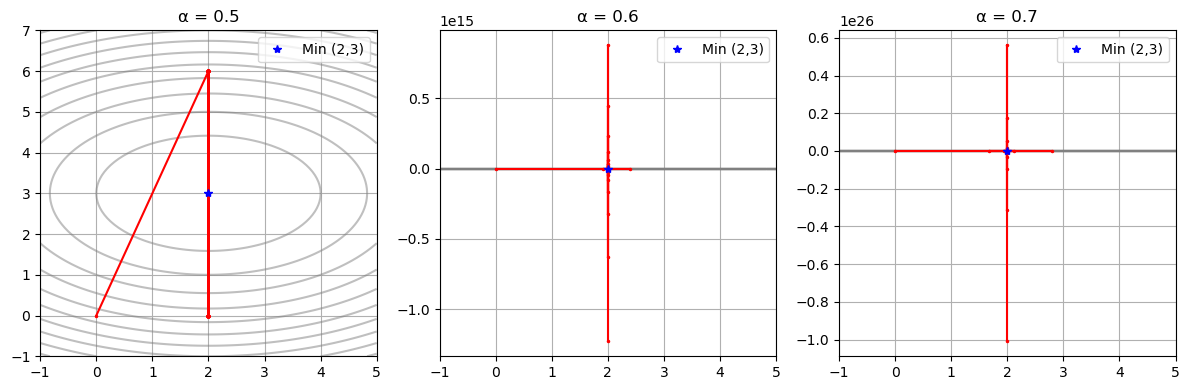

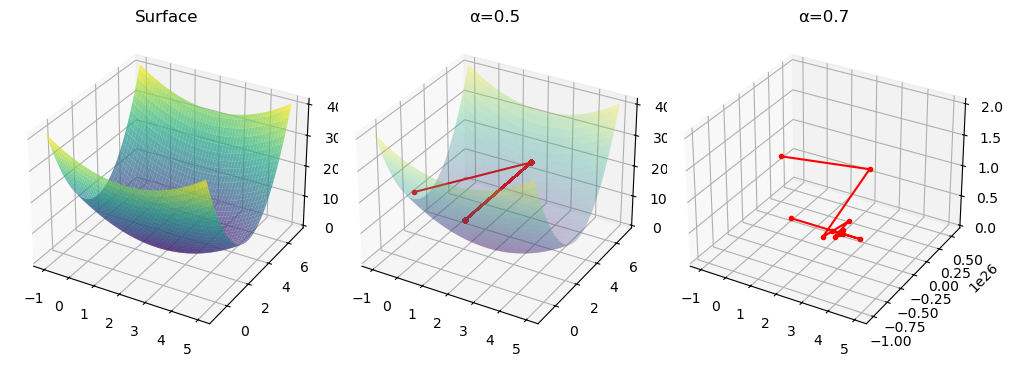


Observations:
- Avec α=0.7, ça converge plus vite
- Mais faut pas prendre α trop grand sinon ça diverge
- Le min est bien en (2,3)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# fonction
def f(x, y):
    return (x - 2)**2 + 2*(y - 3)**2

# Le gradient
def grad(x, y):
    dx = 2*(x - 2)
    dy = 4*(y - 3)
    return dx, dy

# Algo descente gradient
def descente(start_x, start_y, alpha, max_iter=100):
    x = start_x
    y = start_y
    traj = [(x, y)]
    
    for i in range(max_iter):
        gx, gy = grad(x, y)
        x = x - alpha * gx
        y = y - alpha * gy
        traj.append((x, y))
        
        # Arrêt si pas trop bougé
        if abs(gx) < 0.001 and abs(gy) < 0.001:
            break
    
    return np.array(traj)

# Tests avec différents alpha
print("\nTests:")
alphas = [0.5, 0.6, 0.7]

for a in alphas:
    print(f"\nAlpha = {a}")
    traj = descente(0, 0, a)
    last = traj[-1]
    print(f"Point final: ({last[0]:.3f}, {last[1]:.3f})")
    print(f"f = {f(last[0], last[1]):.6f}")
    print(f"Nb itérations: {len(traj)}")



# Grille pour les contours
x = np.linspace(-1, 5, 100)
y = np.linspace(-1, 7, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Figure 1: Contours avec trajectoires
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, a in enumerate([0.5, 0.6, 0.7]):
    traj = descente(0, 0, a)
    ax = axes[i]
    
    ax.contour(X, Y, Z, levels=10, colors='gray', alpha=0.5)
    ax.plot(traj[:, 0], traj[:, 1], 'r.-', markersize=3)
    ax.plot(2, 3, 'b*', label='Min (2,3)')
    ax.set_title(f'α = {a}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# Figure 2: 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 4))

# Surface
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax1.set_title('Surface')

# Traj alpha=0.5
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3)
traj = descente(0, 0, 0.5)
z_vals = f(traj[:, 0], traj[:, 1])
ax2.plot(traj[:, 0], traj[:, 1], z_vals, 'r.-')
ax2.set_title('α=0.5')

# Traj alpha=0.7
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3)
traj = descente(0, 0, 0.7)
z_vals = f(traj[:, 0], traj[:, 1])
ax3.plot(traj[:, 0], traj[:, 1], z_vals, 'r.-')
ax3.set_title('α=0.7')

plt.tight_layout()
plt.show()


print("- Avec α=0.7, ça converge plus vite")
print("- Mais faut pas prendre α trop grand sinon ça diverge")
print("- Le min est bien en (2,3)")

# Exercice 4 : Extremums


1. Dérivées:
∂f/∂x = -2x
∂f/∂y = -6y

2. Points critiques (gradient = 0):
-2x = 0 → x = 0
-6y = 0 → y = 0
Point critique: (0,0)

3. Hessienne:
H = [[-2, 0], [0, -6]]
det(H) = 12 > 0, trace = -8 < 0
→ Maximum en (0,0)

4. Valeur: f(0,0) = 40

5. Pas de minimum car f → -∞ quand x,y → ∞


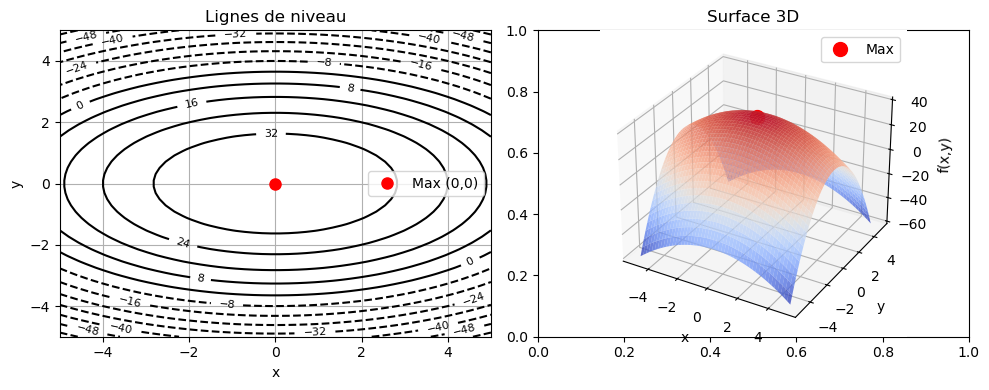


Vérification avec quelques points:
f(0,0) = 40.0
f(1,0) = 39.0
f(0,1) = 37.0
f(2,1) = 33.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f4(x, y):
    return 40 - x**2 - 3*y**2

# Analyse
print("\n1. Dérivées:")
print("∂f/∂x = -2x")
print("∂f/∂y = -6y")

print("\n2. Points critiques (gradient = 0):")
print("-2x = 0 → x = 0")
print("-6y = 0 → y = 0")
print("Point critique: (0,0)")

print("\n3. Hessienne:")
print("H = [[-2, 0], [0, -6]]")
print("det(H) = 12 > 0, trace = -8 < 0")
print("→ Maximum en (0,0)")

print(f"\n4. Valeur: f(0,0) = {f4(0,0)}")

print("\n5. Pas de minimum car f → -∞ quand x,y → ∞")



# Grille
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = f4(X, Y)

# Figure 1: Contours
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

contour = ax1.contour(X, Y, Z, levels=15, colors='black')
ax1.clabel(contour, inline=True, fontsize=8)
ax1.plot(0, 0, 'ro', markersize=8, label='Max (0,0)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Lignes de niveau')
ax1.legend()
ax1.grid(True)

# 3D
ax2 = fig.add_subplot(122, projection='3d')
surf = ax2.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.8)
ax2.plot([0], [0], [f4(0,0)], 'ro', markersize=10, label='Max')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x,y)')
ax2.set_title('Surface 3D')
ax2.legend()

plt.tight_layout()
plt.show()

# Vérif avec quelques points
print("\nVérification avec quelques points:")
test_points = [(0,0), (1,0), (0,1), (2,1)]

for xv, yv in test_points:
    val = f4(xv, yv)
    print(f"f({xv},{yv}) = {val:.1f}")
